In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import chart_studio.tools as tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import gc

import matplotlib.pyplot as plt
import seaborn as sns

import os
print(os.listdir("./input"))
# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))



['Bitcoin Historical Data.csv']


**Data Exploration**

In this section we just explore the Data i.e the Historic Bitcoin Prices and try to find some insights. We will be using the Coinbase dataset as it is one of the mostly used Bitcoin Exchange/Wallet in the world.

In [19]:
import pandas as pd
import numpy as np

In [22]:
data = pd.read_csv('./input/Bitcoin Historical Data.csv')
data.head(10)

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 02, 2020","11,105.8","11,802.6","12,061.1","10,730.7",698.62K,-5.91%
1,"Aug 01, 2020","11,803.1","11,333.2","11,847.7","11,226.1",611.47K,4.14%
2,"Jul 31, 2020","11,333.4","11,096.5","11,434.8","10,964.6",530.95K,2.14%
3,"Jul 30, 2020","11,096.2","11,105.8","11,164.4","10,861.6",501.14K,-0.09%
4,"Jul 29, 2020","11,105.9","10,908.4","11,336.5","10,771.8",576.83K,1.81%
5,"Jul 28, 2020","10,908.5","10,961.1","11,046.1","10,873.6",658.37K,-1.04%
6,"Jul 27, 2020","11,022.8","9,932.7","11,367.0","9,894.6",908.99K,10.98%
7,"Jul 26, 2020","9,932.5","9,690.0","10,086.6","9,645.9",415.07K,2.35%
8,"Jul 25, 2020","9,704.1","9,546.7","9,729.3","9,536.2",306.29K,1.65%
9,"Jul 24, 2020","9,546.4","9,599.2","9,626.2","9,480.5",359.16K,-0.55%


In [24]:
import pandas as pd

# Read CSV without parsing dates
data = pd.read_csv('./input/Bitcoin Historical Data.csv')

# Convert the first column (date) to datetime format
data.iloc[:, 0] = pd.to_datetime(data.iloc[:, 0], format="%b %d, %Y")  # Adjust format if needed

# Display the first few rows to verify
print(data.head())


                  Date     Price      Open      High       Low     Vol.  \
0  2020-08-02 00:00:00  11,105.8  11,802.6  12,061.1  10,730.7  698.62K   
1  2020-08-01 00:00:00  11,803.1  11,333.2  11,847.7  11,226.1  611.47K   
2  2020-07-31 00:00:00  11,333.4  11,096.5  11,434.8  10,964.6  530.95K   
3  2020-07-30 00:00:00  11,096.2  11,105.8  11,164.4  10,861.6  501.14K   
4  2020-07-29 00:00:00  11,105.9  10,908.4  11,336.5  10,771.8  576.83K   

  Change %  
0   -5.91%  
1    4.14%  
2    2.14%  
3   -0.09%  
4    1.81%  


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3669 entries, 0 to 3668
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      3669 non-null   object
 1   Price     3669 non-null   object
 2   Open      3669 non-null   object
 3   High      3669 non-null   object
 4   Low       3669 non-null   object
 5   Vol.      3669 non-null   object
 6   Change %  3669 non-null   object
dtypes: object(7)
memory usage: 200.8+ KB


In [26]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-08-02 00:00:00,"11,105.8","11,802.6","12,061.1","10,730.7",698.62K,-5.91%
1,2020-08-01 00:00:00,"11,803.1","11,333.2","11,847.7","11,226.1",611.47K,4.14%
2,2020-07-31 00:00:00,"11,333.4","11,096.5","11,434.8","10,964.6",530.95K,2.14%
3,2020-07-30 00:00:00,"11,096.2","11,105.8","11,164.4","10,861.6",501.14K,-0.09%
4,2020-07-29 00:00:00,"11,105.9","10,908.4","11,336.5","10,771.8",576.83K,1.81%


Little preprocessing required, replacing the NaN values with zeroes and previous data.

In [29]:
# First thing is to fix the data for bars/candles where there are no trades.
# Volume/trades are a single event so fill NaNs with zeroes for relevant fields...
data['Vol.'].fillna(value=0, inplace=True)  # Adjusted to match dataset

# Next, we need to fix the OHLC (open, high, low, close) data,
# which is a continuous time series, so let's fill forward those values...
data['Open'].fillna(method='ffill', inplace=True)
data['High'].fillna(method='ffill', inplace=True)
data['Low'].fillna(method='ffill', inplace=True)
data['Price'].fillna(method='ffill', inplace=True)  # Adjusted: "Price" is the close price in dataset

# Display first few rows
data.head()


,Date,Price,Open,High,Low,Vol.,Change %
0,2020-08-02 00:00:00,"11,105.8","11,802.6","12,061.1","10,730.7",698.62K,-5.91%
1,2020-08-01 00:00:00,"11,803.1","11,333.2","11,847.7","11,226.1",611.47K,4.14%
2,2020-07-31 00:00:00,"11,333.4","11,096.5","11,434.8","10,964.6",530.95K,2.14%
3,2020-07-30 00:00:00,"11,096.2","11,105.8","11,164.4","10,861.6",501.14K,-0.09%
4,2020-07-29 00:00:00,"11,105.9","10,908.4","11,336.5","10,771.8",576.83K,1.81%


Creating Weekly Rows for the Data Visualization

In [31]:
# Import required modules
import datetime
import pytz

# Convert 'Date' column to datetime format (if not already)
data['Date'] = pd.to_datetime(data['Date'], format="%b %d, %Y")

# Define the valid date range (convert to timezone-naive to match dataset)
start = datetime.datetime(2015, 1, 1, 0, 0, 0, 0, pytz.UTC).replace(tzinfo=None)
end = datetime.datetime(2018, 11, 11, 0, 0, 0, 0, pytz.UTC).replace(tzinfo=None)

# Find rows within the date range and group by week (starting Monday)
weekly_rows = data[(data['Date'] >= start) & (data['Date'] <= end)].groupby(
    [pd.Grouper(key='Date', freq='W-MON')]
).first().reset_index()

# Display the first few rows
weekly_rows.head()


,Date,Price,Open,High,Low,Vol.,Change %
0,2015-01-05,274.8,264.7,278.3,262.9,54.99K,3.82%
1,2015-01-12,269.3,264.8,273.1,263.3,25.39K,1.72%
2,2015-01-19,215.9,210.6,219.5,205.5,31.58K,2.49%
3,2015-01-26,269.2,252.1,310.9,251.5,105.71K,6.78%
4,2015-02-02,238.9,225.3,242.5,220.5,39.02K,6.02%


Lets visualize Historical Bitcoin Prices (2015-2018)

In [32]:
import plotly.graph_objects as go
import plotly.io as pio
import pandas as pd

# Convert numeric columns from string to float
numeric_columns = ["Open", "Price"]
for col in numeric_columns:
    data[col] = data[col].astype(str).str.replace(",", "").astype(float)

# Define date range
start = pd.to_datetime("2015-01-01")
end = pd.to_datetime("2018-11-11")

# Filter and group data weekly (starting Monday)
weekly_rows = data[(data['Date'] >= start) & (data['Date'] <= end)].groupby(
    [pd.Grouper(key='Date', freq='W-MON')]
).first().reset_index()

# Create traces
trace1 = go.Scatter(x=weekly_rows['Date'], y=weekly_rows['Open'], mode='lines', name='Open')
trace2 = go.Scatter(x=weekly_rows['Date'], y=weekly_rows['Price'], mode='lines', name='Close')

# Define layout
layout = dict(
    title='Historical Bitcoin Prices (2015-2018) with the Slider',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=12, label='1y', step='month', stepmode='backward'),
                dict(count=36, label='3y', step='month', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(visible=True),
        type='date'
    ),
    yaxis=dict(title="Bitcoin Price (USD)")
)

# Create and display figure
fig = go.Figure(data=[trace1, trace2], layout=layout)
pio.show(fig)


## 📊 Nhận xét về biểu đồ "Historical Bitcoin Prices (2015-2018)"

### **1️⃣ Tổng quan**
- Biểu đồ hiển thị **giá mở cửa (Open) và giá đóng cửa (Close) của Bitcoin từ 2015 đến 2018**.
- Sử dụng **biểu đồ đường (line chart)** để thể hiện biến động giá theo thời gian.
- Thanh trượt cho phép điều chỉnh khoảng thời gian quan sát.

### **2️⃣ Nhận xét dữ liệu**
- **2015 - 2016**: Giá Bitcoin biến động thấp, chủ yếu đi ngang.
- **2017**: Xu hướng tăng rõ rệt, báo hiệu sự quan tâm ngày càng cao từ thị trường.
- **Cuối 2017 - Đầu 2018**: Bitcoin đạt đỉnh gần **$20,000**, sau đó giảm mạnh.
- **Sau 2018**: Giá ổn định hơn nhưng không quay lại mức đỉnh trước đó.

### **3️⃣ Đề xuất cải thiện**
- **Phân biệt rõ hơn giữa đường "Open" và "Close"** bằng màu sắc hoặc kiểu đường (dashed/solid).
- **Thêm điểm chú thích vào các sự kiện quan trọng** như mức đỉnh giá hoặc thời điểm giảm mạnh.
- **Kết hợp với khối lượng giao dịch (Volume) để thấy rõ sự tương quan giữa biến động giá và giao dịch**.

### **📌 Kết luận**
Biểu đồ thể hiện chính xác xu hướng giá Bitcoin, đặc biệt trong giai đoạn tăng mạnh 2017-2018. Một số cải tiến có thể giúp trực quan hóa dữ liệu tốt hơn.

Lets visualize Historical Bitcoin Market Volume (2015-2018)

In [36]:
import plotly.graph_objects as go
import pandas as pd

# Function to convert volume values to numeric format
def convert_volume(value):
    if isinstance(value, str):
        value = value.replace(",", "").strip()  # Remove commas and spaces
        if "K" in value:
            return float(value.replace("K", "")) * 1_000
        elif "M" in value:
            return float(value.replace("M", "")) * 1_000_000
        elif value == "-" or value == "":  # Handle missing or empty values
            return 0
    try:
        return float(value)  # Convert to float if already numeric
    except ValueError:
        return 0  # Default to 0 for unexpected values

# Apply conversion to 'Vol.' column
weekly_rows['Vol.'] = weekly_rows['Vol.'].apply(convert_volume)

# Create Plotly trace for Bitcoin market volume
trace1 = go.Scatter(
    x=weekly_rows['Date'],
    y=weekly_rows['Vol.'],
    mode='lines',
    name='Bitcoin Market Volume (USD)'
)

# Define layout with range selector and range slider
layout = dict(
    title='Historical Bitcoin Market Volume (2015-2018) with the Slider',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=12, label='1y', step='month', stepmode='backward'),
                dict(count=36, label='3y', step='month', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(visible=True),
        type='date'
    ),
    yaxis=dict(title="Market Volume (USD)")
)

# Create figure
fig = go.Figure(data=[trace1], layout=layout)

# Show figure
fig.show()

## 📊 Nhận xét về biểu đồ "Historical Bitcoin Market Volume (2015-2018)"

### **1️⃣ Tổng quan**
- Biểu đồ hiển thị **khối lượng giao dịch Bitcoin (USD)** từ **2015 đến 2018**.
- Xu hướng chung cho thấy **biến động mạnh vào cuối 2017 - đầu 2018**.
- Thanh trượt giúp quan sát chi tiết hơn theo từng khoảng thời gian.

### **2️⃣ Nhận xét dữ liệu**
- **2015 - 2016**: Khối lượng giao dịch thấp, ít biến động.
- **2017**: Bắt đầu tăng dần, phản ánh sự quan tâm lớn hơn từ thị trường.
- **Cuối 2017 - Đầu 2018**: **Bùng nổ giao dịch**, trùng với đợt tăng giá mạnh của Bitcoin.
- **Sau 2018**: Giảm nhanh sau khi Bitcoin điều chỉnh giá.

### **3️⃣ Đề xuất cải thiện**
- **Sử dụng màu sắc nổi bật hơn hoặc biểu đồ cột (bar chart) để dễ phân biệt mức độ giao dịch**.
- **Kết hợp với biểu đồ giá Bitcoin để thấy rõ mối tương quan giữa giá và khối lượng giao dịch**.
- **Thêm chú thích vào các thời điểm quan trọng như Bitcoin đạt đỉnh hoặc suy giảm mạnh**.

### **📌 Kết luận**
Biểu đồ phản ánh rõ xu hướng giao dịch của Bitcoin, đặc biệt là giai đoạn tăng trưởng mạnh 2017-2018. Một số điều chỉnh về trực quan có thể giúp phân tích dữ liệu dễ dàng hơn.

In [37]:
import plotly.graph_objects as go

# Convert volume column to float
weekly_rows['Vol.'] = weekly_rows['Vol.'].apply(convert_volume)

# Create scatter plot for BTC Volume vs USD
trace = go.Scattergl(
    y=weekly_rows['Vol.'],  # Adjusted 'Volume_(BTC)' to 'Vol.'
    x=weekly_rows['Price'],  # Adjusted 'Weighted_Price' to 'Price'
    mode='markers',
    marker=dict(
        color='#FFBAD2',
        line=dict(width=1)
    )
)

layout = go.Layout(
    title='BTC Volume vs USD',
    xaxis=dict(
        title='Bitcoin Price (USD)',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Bitcoin Market Volume',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

data = [trace]
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()

## 📊 Nhận xét về biểu đồ "BTC Volume vs USD"

### **1️⃣ Tổng quan**
- Biểu đồ thể hiện mối quan hệ giữa **khối lượng giao dịch Bitcoin (Vol.)** và **giá Bitcoin (USD)**.
- Dữ liệu được hiển thị dưới dạng **biểu đồ phân tán (scatter plot)**.
- Có sự tập trung lớn của điểm dữ liệu ở mức giá thấp, đặc biệt dưới **5,000 USD**.

### **2️⃣ Nhận xét dữ liệu**
- **Phần lớn giao dịch xảy ra khi giá Bitcoin dưới 5,000 USD**, thể hiện sự tham gia mạnh của thị trường trong giai đoạn giá thấp.
- **Biến động tăng mạnh ở mức giá cao** (~15,000 - 20,000 USD) nhưng số lượng điểm dữ liệu ít hơn, cho thấy giai đoạn đầu cơ cao.
- **Một số điểm dữ liệu có khối lượng giao dịch rất cao**, có thể liên quan đến sự kiện thị trường quan trọng.

### **3️⃣ Đề xuất cải thiện**
- **Thêm màu sắc dựa trên mật độ giao dịch** để làm rõ mức độ tập trung.
- **Sử dụng kích thước điểm thay đổi theo khối lượng giao dịch** để hiển thị thông tin tốt hơn.
- **Kết hợp biểu đồ đường thể hiện xu hướng biến động của khối lượng giao dịch theo thời gian**.

### **📌 Kết luận**
Biểu đồ phản ánh rõ mối quan hệ giữa giá và khối lượng giao dịch Bitcoin, với sự tập trung lớn ở mức giá thấp và biến động cao khi giá tăng. Một số cải tiến có thể giúp trực quan hóa dữ liệu tốt hơn.

**Predicting using LSTM**

In the first section, we use LSTM  (Long short-term memory ). LSTM units are units of a recurrent neural network (RNN). An RNN composed of LSTM units is often called an LSTM network (or just LSTM). A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate. The cell remembers values over arbitrary time intervals and the three gates regulate the flow of information into and out of the cell. Read more about LSTMs [here.](https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21)

Though LSTM is not ideal for forecasting turbulent market like Bitcoin but we still take a chance here.

In [4]:
import pandas as pd

# Load the dataset
file_path = "./input/Bitcoin Historical Data.csv"  # Adjusted to match your dataset

# Read CSV with date parsing
data = pd.read_csv(file_path, parse_dates=['Date'])

# Remove timezone information if present (not needed for this dataset)
data['Date'] = data['Date'].dt.tz_localize(None)

# Resample data to hourly intervals and take the first value for each hour (adjusted for daily data)
data = data.groupby(pd.Grouper(key='Date', freq='D')).first().reset_index()

# Set Date as index
data = data.set_index('Date')

# Keep only 'Price' column (adjusted from 'Weighted_Price') and fill missing values
if 'Price' in data.columns:
    data = data[['Price']]
    data['Price'].fillna(method='ffill', inplace=True)
else:
    print("Column 'Price' not found in dataset")

# Display processed data
print(data.head())

           Price
Date            
2010-07-18   0.1
2010-07-19   0.1
2010-07-20   0.1
2010-07-21   0.1
2010-07-22   0.1


For the train and test, we take '25-Jun-2018' as the split date.  There was a considerable dip in Bitcoin prices between the June-July period 2018.  If we check the historical prices the seasonal market started going up from this date after reaching the lowest, though the price reached much lower $5972 on June 29th 2018. After reaching the historic 20K mark on December 18th, there were several dips and market price was recorrected every time. Read more about [Bitcoin dips.](http://https://news.bitcoin.com/data-reveals-reasons-behind-bitcoins-big-dip/)

In [6]:
import pandas as pd

# Load the dataset
file_path = "./input/Bitcoin Historical Data.csv"  # Adjusted to match your dataset

# Read CSV with date parsing
data = pd.read_csv(file_path, parse_dates=['Date'])

# Remove timezone information if present (not needed for this dataset)
data['Date'] = data['Date'].dt.tz_localize(None)

# Resample data to daily intervals and take the first value for each day
data = data.groupby(pd.Grouper(key='Date', freq='D')).first().reset_index()

# Set Date as index
data = data.set_index('Date')

# Keep only 'Price' column (adjusted from 'Weighted_Price') and fill missing values
if 'Price' in data.columns:
    data = data[['Price']]
    data['Price'].fillna(method='ffill', inplace=True)
else:
    print("Column 'Price' not found in dataset")

# Split dataset into training and testing sets
split_date = '2018-06-25'  # Adjusted to match dataset format
data_train = data.loc[data.index <= split_date].copy()
data_test = data.loc[data.index > split_date].copy()

# Display dataset split info
print(f"Training data: {data_train.shape[0]} records")
print(f"Testing data: {data_test.shape[0]} records")

Training data: 2900 records
Testing data: 769 records


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = "./input/Bitcoin Historical Data.csv"  # Adjusted to match your dataset

# Read CSV with date parsing
data = pd.read_csv(file_path, parse_dates=['Date'])

# Remove timezone information if present (not needed for this dataset)
data['Date'] = data['Date'].dt.tz_localize(None)

# Resample data to daily intervals and take the first value for each day
data = data.groupby(pd.Grouper(key='Date', freq='D')).first().reset_index()

# Set Date as index
data = data.set_index('Date')

# Keep only 'Price' column (adjusted from 'Weighted_Price') and fill missing values
if 'Price' in data.columns:
    data['Price'] = data['Price'].astype(str).str.replace(',', '').astype(float)  # Convert string to float
    data = data[['Price']]
    data['Price'].fillna(method='ffill', inplace=True)
else:
    print("Column 'Price' not found in dataset")

# Split dataset into training and testing sets
split_date = '2018-06-25'  # Adjusted to match dataset format
data_train = data.loc[data.index <= split_date].copy()
data_test = data.loc[data.index > split_date].copy()

# Data preprocessing
training_set = data_train.values
training_set = np.reshape(training_set, (len(training_set), 1))

# Normalize data using MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

# Prepare input and output sequences
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

# Display shape of training data
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (2899, 1, 1)
y_train shape: (2899, 1)


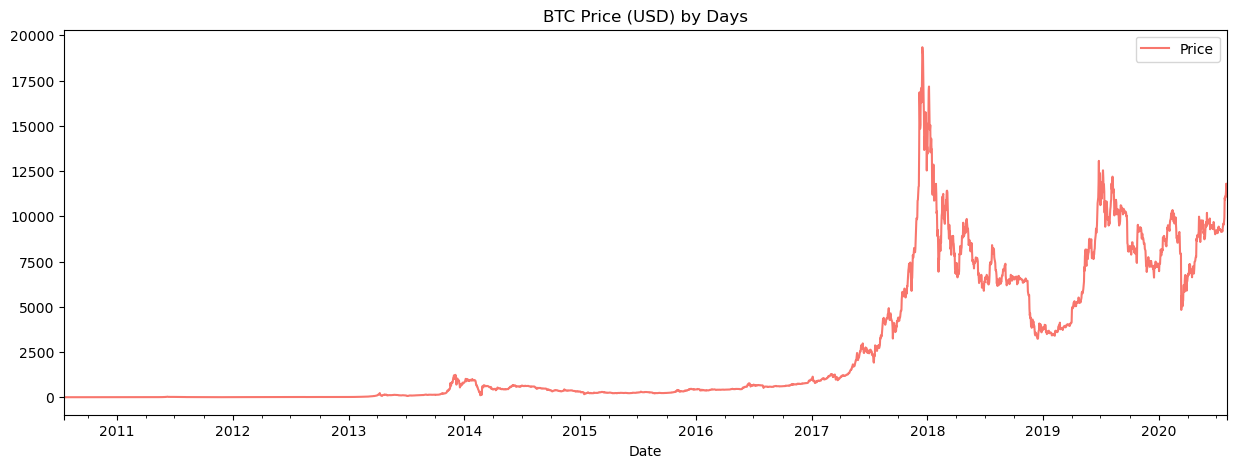

In [9]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = data.plot(style='', figsize=(15,5), color=color_pal[0], title='BTC Price (USD) by Days')


## 📊 Nhận xét về biểu đồ "BTC Price (USD) by Days"

### **1️⃣ Tổng quan**
- Biểu đồ thể hiện **giá Bitcoin theo ngày** từ dữ liệu lịch sử.
- Xu hướng giá được hiển thị bằng **biểu đồ đường (line chart)**.
- Trục X đại diện cho **thời gian**, trục Y đại diện cho **giá Bitcoin (USD)**.

### **2️⃣ Nhận xét dữ liệu**
- **Trước 2017**: Giá Bitcoin thấp và ít biến động.
- **2017 - 2018**: Bitcoin tăng mạnh, đạt đỉnh gần **20,000 USD**, sau đó sụt giảm nhanh.
- **2019 - 2020**: Giá Bitcoin có sự phục hồi nhưng vẫn có nhiều biến động.

### **3️⃣ Đề xuất cải thiện**
- **Thêm chú thích vào các mốc quan trọng** như mức đỉnh 2017-2018.
- **Sử dụng màu sắc nổi bật hơn hoặc biểu đồ nến (candlestick chart)** để hiển thị rõ hơn.
- **Kết hợp với dữ liệu khối lượng giao dịch (Volume)** để phân tích tác động của thị trường.

### **📌 Kết luận**
Biểu đồ phản ánh rõ xu hướng tăng trưởng và biến động của Bitcoin qua các giai đoạn. Một số cải tiến có thể giúp trực quan hóa dữ liệu tốt hơn.

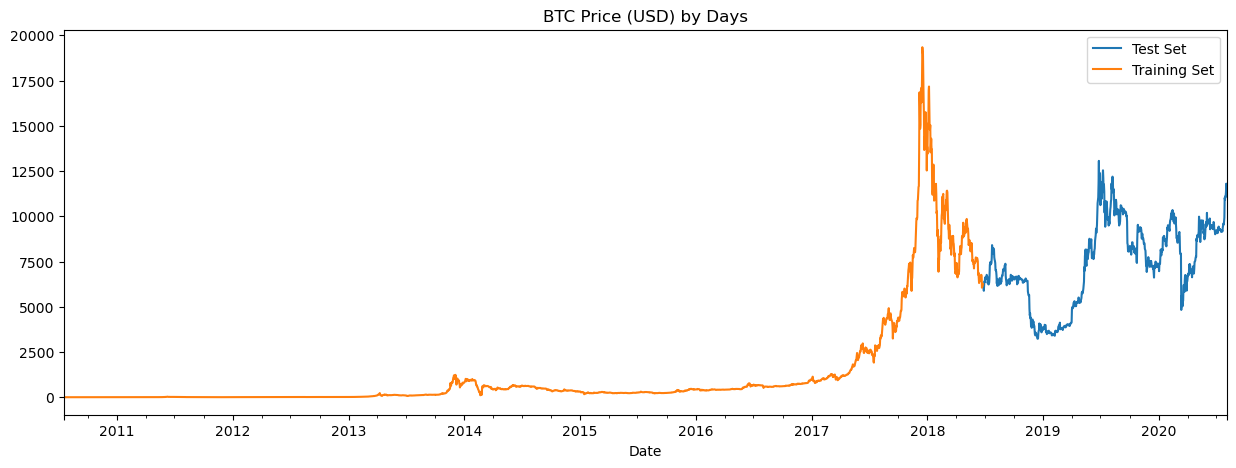

In [10]:
_ = data_test \
    .rename(columns={'Price': 'Test Set'}) \
    .join(data_train.rename(columns={'Price': 'Training Set'}), how='outer') \
    .plot(figsize=(15,5), title='BTC Price (USD) by Days', style='')

## 📊 Nhận xét về biểu đồ "BTC Price (USD) by Days"

### **1️⃣ Tổng quan**
- Biểu đồ thể hiện **sự phân tách giữa tập huấn luyện (Training Set) và tập kiểm tra (Test Set)** của giá Bitcoin theo ngày.
- **Training Set** được hiển thị bằng màu cam, trong khi **Test Set** được hiển thị bằng màu xanh.
- Trục X đại diện cho **thời gian**, trục Y đại diện cho **giá Bitcoin (USD)**.

### **2️⃣ Nhận xét dữ liệu**
- **Training Set (trước 2018-06-25)**: Giá Bitcoin tăng dần từ 2016, đạt đỉnh gần **$20,000 vào cuối 2017**, sau đó giảm mạnh.
- **Test Set (sau 2018-06-25)**: Giá Bitcoin tiếp tục biến động với sự hồi phục trong giai đoạn 2019-2020 nhưng vẫn có sự dao động lớn.
- Sự phân tách rõ ràng giúp đánh giá khả năng dự đoán của mô hình LSTM trên tập kiểm tra.

### **3️⃣ Đề xuất cải thiện**
- **Thêm điểm chú thích vào các mốc quan trọng** như đỉnh giá 2017 và các vùng biến động mạnh.
- **Sử dụng đường viền rõ hơn hoặc marker cho dữ liệu Test Set** để dễ phân biệt.
- **Kết hợp thêm đường xu hướng dự đoán từ mô hình LSTM** để so sánh với dữ liệu thực tế.

### **📌 Kết luận**
Biểu đồ cung cấp cái nhìn rõ ràng về xu hướng giá Bitcoin và cách tập dữ liệu được phân tách. Việc thêm các yếu tố trực quan có thể giúp đánh giá mô hình dự đoán tốt hơn.

We will use a Vanilla LSTM here for forecasting. The model is trained on pre 25-Jun-2018 data.

In [21]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import numpy as np

# Kiểm tra lại dữ liệu đầu vào
X_train = np.reshape(X_train, (len(X_train), 1, 1))
y_train = np.reshape(y_train, (len(y_train), 1))

# Khởi tạo mô hình
model = Sequential()
model.add(LSTM(128, activation="sigmoid", input_shape=(1,1)))
model.add(Dropout(0.2))
model.add(Dense(1))

# Biên dịch mô hình
model.compile(loss='mean_squared_error', optimizer='adam')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=2)


ImportError: Traceback (most recent call last):
  File "c:\Users\Admin\anaconda3\Lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

In [22]:
model.summary()

NameError: name 'model' is not defined

In [ ]:
# Making the predictions
test_set = data_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = model.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

In [ ]:
data_test['Weighted_Price_Prediction'] = predicted_BTC_price
data_all = pd.concat([data_test, data_train], sort=False)

In [ ]:
#saving the predicted values in a common data frame for future comparision
final_data = data_all
final_data = final_data.reset_index()
final_data = final_data.rename(columns={'Weighted_Price_Prediction': 'lstm'})
final_data = final_data[['Timestamp','Weighted_Price','lstm']]

In [ ]:
_ = data_all[['Weighted_Price','Weighted_Price_Prediction']].plot(figsize=(15, 5))

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = data_all[['Weighted_Price_Prediction','Weighted_Price']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='08-01-2018', upper='09-01-2018')
ax.set_ylim(0, 10000)
plot = plt.suptitle('August 2018 Forecast vs Actuals')

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = data_all[['Weighted_Price_Prediction','Weighted_Price']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='08-01-2018', upper='08-08-2018')
ax.set_ylim(0, 10000)
plot = plt.suptitle('First Week of August 2018 Forecast vs Actuals')

The MSE is 2917.40 and MAE is 53.84

In [ ]:
#calculate MSE and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(y_true=data_test['Weighted_Price'],
                   y_pred=data_test['Weighted_Price_Prediction'])

In [ ]:
mean_absolute_error(y_true=data_test['Weighted_Price'],
                   y_pred=data_test['Weighted_Price_Prediction'])

We can clearly see the entire model is over-fitted. 

**Time Series forecasting with XGBoost**

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance. XGBoost is a powerful and versatile tool. Lets see, How well does XGBoost perform when used to predict future values of a time-series like Bitcoin prices ? 

Read more about [XGBoost here.](https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [ ]:
data = pd.read_csv('../input/coinbaseUSD_1-min_data_2014-12-01_to_2018-11-11.csv',parse_dates=[0], date_parser=dateparse) 
data['Timestamp'] = data['Timestamp'].dt.tz_localize(None)
data = data.groupby([pd.Grouper(key='Timestamp', freq='H')]).first().reset_index()
data = data.set_index('Timestamp')
data = data[['Weighted_Price']]
data['Weighted_Price'].fillna(method='ffill', inplace=True)

In [ ]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = data.plot(style='', figsize=(15,5), color=color_pal[0], title='BTC Weighted_Price Price (USD) by Hours')

In [ ]:
split_date = '25-Jun-2018'
data_train = data.loc[data.index <= split_date].copy()
data_test = data.loc[data.index > split_date].copy()

In [ ]:
_ = data_test \
    .rename(columns={'Weighted_Price': 'Test Set'}) \
    .join(data_train.rename(columns={'Weighted_Price': 'Training Set'}), how='outer') \
    .plot(figsize=(15,5), title='BTC Weighted_Price Price (USD) by Hours', style='')

In [ ]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [ ]:
X_train, y_train = create_features(data_train, label='Weighted_Price')
X_test, y_test = create_features(data_test, label='Weighted_Price')

Here we use a basic XGBRegressor model,

In [ ]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
model =  xgb.XGBRegressor(objective ='reg:linear',min_child_weight=10, booster='gbtree', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
model.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

In [ ]:
data_test['Weighted_Price_Prediction'] = model.predict(X_test)
data_all = pd.concat([data_test, data_train], sort=False)

In [ ]:
#adding to final data for comparision
final_data = pd.merge(final_data, data_all, sort=False)
final_data = final_data.rename(columns={'Weighted_Price_Prediction': 'xgboost'})
final_data = final_data[['Timestamp','Weighted_Price','lstm','xgboost']]

In [ ]:
_ = data_all[['Weighted_Price','Weighted_Price_Prediction']].plot(figsize=(15, 5))

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = data_all[['Weighted_Price_Prediction','Weighted_Price']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='08-01-2018', upper='09-01-2018')
ax.set_ylim(0, 10000)
plot = plt.suptitle('August 2018 Forecast vs Actuals')

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = data_all[['Weighted_Price_Prediction','Weighted_Price']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='08-01-2018', upper='08-08-2018')
ax.set_ylim(0, 10000)
plot = plt.suptitle('First Week of August 2018 Forecast vs Actuals')

The MSE is 484476.69 and MAE is 474.81

In [ ]:
mean_squared_error(y_true=data_test['Weighted_Price'],
                   y_pred=data_test['Weighted_Price_Prediction'])

In [ ]:
mean_absolute_error(y_true=data_test['Weighted_Price'],
                   y_pred=data_test['Weighted_Price_Prediction'])

**Time Series forecasting with Prophet**

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well. Refer [Prophet here.](https://facebook.github.io/prophet/)

The Prophet package provides intuitive parameters which are easy to tune. Even someone with minimum expertise in forecasting models can use this to make meaningful predictions for a variety of problems in a business scenario.





In [ ]:
data = pd.read_csv('../input/coinbaseUSD_1-min_data_2014-12-01_to_2018-11-11.csv',parse_dates=[0], date_parser=dateparse) 
data['Timestamp'] = data['Timestamp'].dt.tz_localize(None)
data = data.groupby([pd.Grouper(key='Timestamp', freq='H')]).first().reset_index()
data = data.set_index('Timestamp')
data = data[['Weighted_Price']]
data['Weighted_Price'].fillna(method='ffill', inplace=True)

In [ ]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = data.plot(style='', figsize=(15,5), color=color_pal[0], title='BTC Weighted_Price Price (USD) by Hours')

In [ ]:
split_date = '25-Jun-2018'
data_train = data.loc[data.index <= split_date].copy()
data_test = data.loc[data.index > split_date].copy()

In [ ]:
_ = data_test \
    .rename(columns={'Weighted_Price': 'Test Set'}) \
    .join(data_train.rename(columns={'Weighted_Price': 'Training Set'}), how='outer') \
    .plot(figsize=(15,5), title='BTC Weighted_Price Price (USD) by Hours', style='')

In [ ]:
data_train = data_train.reset_index().rename(columns={'Timestamp':'ds', 'Weighted_Price':'y'})

In [ ]:
# Setup and train model
model = Prophet()
model.fit(data_train)

In [ ]:
# Predict on training set with model
data_test_fcst = model.predict(df=data_test.reset_index().rename(columns={'Timestamp':'ds'}))

In [ ]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(data_test_fcst, ax=ax)

In [ ]:
# Plot the components
fig = model.plot_components(data_test_fcst)

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(data_test.index, data_test['Weighted_Price'], color='r')
fig = model.plot(data_test_fcst, ax=ax)

In [ ]:
#for comparision of predictions
data_fcst = data_test_fcst
data_fcst = data_fcst.rename(columns={'ds': 'Timestamp'})
data_all = pd.concat([data_fcst, data_train], sort=False)
final_data = pd.merge(final_data, data_all, sort=False)
final_data = final_data.rename(columns={'yhat': 'prophet'})
final_data = final_data[['Timestamp','Weighted_Price','lstm','xgboost','prophet']]

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(data_test.index, data_test['Weighted_Price'], color='r')
fig = model.plot(data_test_fcst, ax=ax)
ax.set_xbound(lower='08-01-2018', upper='09-01-2018')
ax.set_ylim(0, 10000)
plot = plt.suptitle('August 2018 Forecast vs Actuals')

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(data_test.index, data_test['Weighted_Price'], color='r')
fig = model.plot(data_test_fcst, ax=ax)
ax.set_xbound(lower='08-01-2018', upper='08-08-2018')
ax.set_ylim(0, 10000)
plot = plt.suptitle('First Week of August 2018 Forecast vs Actuals')

The MSE is 3654149.48 and MAE is 1678.49

In [ ]:
mean_squared_error(y_true=data_test['Weighted_Price'],
                   y_pred=data_test_fcst['yhat'])

In [ ]:
mean_absolute_error(y_true=data_test['Weighted_Price'],
                   y_pred=data_test_fcst['yhat'])

**LSTM , XGBoost and Prophet - How good are they ?**

Here lets visualize and compare the predictive results of LSTM, XGBoost and Prophet in a single plot,

In [ ]:
# Create traces
trace0 = go.Scatter(
    x = final_data['Timestamp'],
    y = final_data['Weighted_Price'],
    mode = 'lines+markers',
    name = 'Real Price'
)
trace1 = go.Scatter(
    x = final_data['Timestamp'],
    y = final_data['lstm'],
    mode = 'lines+markers',
    name = 'LSTM Prediction'
)
trace2 = go.Scatter(
    x = final_data['Timestamp'],
    y = final_data['xgboost'],
    mode = 'lines+markers',
    name = 'XGBoost Prediction'
)
trace3 = go.Scatter(
    x = final_data['Timestamp'],
    y = final_data['prophet'],
    mode = 'lines+markers',
    name = 'Prophet Prediction'
)

# Edit the layout
layout = dict(title = 'Comparision of LSTM,XGBoost and Prophet',
              xaxis = dict(title = 'Month'),
              yaxis = dict(title = 'Prices (USD)'),
              )

data = [trace0, trace1, trace2, trace3]
fig = dict(data=data, layout=layout)
iplot(fig, filename='styled-line')

**Time Series forecasting using ARIMA**

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a class of model that captures a suite of different standard temporal structures in time series data.
This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:
* AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
* I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
* MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

ARIMA is one of the mostly used techniques for Time Series analysis. In Python,  ARIMA based forecasting models can be created either using AutoARIMA[(Pyramid ARIMA)](https://pypi.org/project/pyramid-arima/) or [StatsModel ](https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima_model.ARIMA.html). Here we will be using StatsModel as Kaggle do not support Pyramid ARIMA till now.

In [ ]:
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product

In [ ]:
data = pd.read_csv('../input/coinbaseUSD_1-min_data_2014-12-01_to_2018-11-11.csv',parse_dates=[0], date_parser=dateparse) 

In [ ]:
data['Open'].fillna(method='ffill', inplace=True)
data['High'].fillna(method='ffill', inplace=True)
data['Low'].fillna(method='ffill', inplace=True)
data['Close'].fillna(method='ffill', inplace=True)
data['Weighted_Price'].fillna(method='ffill', inplace=True)
data['Volume_(BTC)'].fillna(method='ffill', inplace=True)
data['Volume_(Currency)'].fillna(method='ffill', inplace=True)

In [ ]:
plt.figure(figsize=[20,8])
plt.title('BTC Weighted_Price Price (USD) by Hours')
plt.plot(data.Weighted_Price, '-', label='By Hours')

In previous sections of LSTM,XGBoost and Prophet, we used hourly data to train the model. But here we will use the monthly data (for Seasonality).

In [ ]:
data['Timestamp'] = data['Timestamp'].dt.tz_localize(None)
data = data.groupby([pd.Grouper(key='Timestamp', freq='M')]).first().reset_index()
data = data.set_index('Timestamp')
data['Weighted_Price'].fillna(method='ffill', inplace=True)

In [ ]:
plt.figure(figsize=[20,8])
plt.title('BTC Weighted_Price Price (USD) by Months')
plt.plot(data.Weighted_Price, '-', label='By Months')

Decomposition

In [ ]:
decomposition = sm.tsa.seasonal_decompose(data.Weighted_Price)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig = plt.figure(figsize=(20,8))

plt.subplot(411)
plt.plot(data.Weighted_Price, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

fig.suptitle('Decomposition of Prices Data')
plt.show()

In [ ]:
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(data.Weighted_Price)[1])

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(20,8))
pyplot.subplot(211)
plot_acf(data.Weighted_Price, ax=pyplot.gca(),lags=40)
pyplot.subplot(212)
plot_pacf(data.Weighted_Price, ax=pyplot.gca(), lags=50)
pyplot.show()

Here's the Statespace ARIMA Model, the best model is selected using different parameters.

In [ ]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(data.Weighted_Price, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12),enforce_stationarity=False,
                                            enforce_invertibility=False).fit(disp=-1)
    except ValueError:
        #print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [ ]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

In [ ]:
fig = plt.figure(figsize=(20,8))
best_model.resid.plot()
fig.suptitle('Residual Plot of the Best Model')
print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid)[1])

In [ ]:
df_month2 = data[['Weighted_Price']]
future = pd.DataFrame()
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = best_model.predict(start=0, end=200)
plt.figure(figsize=(15,7))
df_month2.Weighted_Price.plot()
df_month2.forecast.plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin Prices (USD) Predicted vs Actuals, by months')
plt.ylabel('mean USD')
plt.show()

In [ ]:
# from scipy import stats
# import statsmodels.api as sm
# import warnings
# from itertools import product

In [ ]:
# data = pd.read_csv('../input/coinbaseUSD_1-min_data_2014-12-01_to_2018-11-11.csv',parse_dates=[0], date_parser=dateparse) 
# data.head()

In [ ]:
# data['Timestamp'] = data['Timestamp'].dt.tz_localize(None)
# data = data.groupby([pd.Grouper(key='Timestamp', freq='M')]).first().reset_index()
# data = data.set_index('Timestamp')
# data['Weighted_Price'].fillna(method='ffill', inplace=True)

In [ ]:
# plt.figure(figsize=[20,8])
# plt.title('BTC Weighted_Price Price (USD) by Months')
# plt.plot(data.Weighted_Price, '-', label='By Months')

We can see how the above models perform with Historic Bitcoin Price data.  The prediction is not good. The Bitcoin prices are very volatile and very random, and is often influenced by external factors (or news) such as Cryptocurrency regulations, Investments or simple rumours on social media. We need additional data from news or social media to make these models perform better and more accurately. 

Note : Will add GARCH in the next version. 